In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [147]:
file1 = os.path.join('clinicaltrial_data.csv')
file2 = os.path.join('mouse_drug_data.csv')

trial_data = pd.read_csv(file1)
mouse_data = pd.read_csv(file2)

merged_df = trial_data.merge(mouse_data, how="left", on = 'Mouse ID')
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [148]:

#group by treatment for change in average tumor size calculations
avg_volume = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
volume_sem = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])

In [149]:
#munging of avg tumor volume data
avg_volume = avg_volume.unstack(level = 0)
avg_volume.columns = avg_volume.columns.get_level_values(1)
avg_volume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [150]:
#munging of avg tumor volume data - std error
volume_sem = volume_sem.unstack(level=0)
volume_sem.columns = volume_sem.columns.get_level_values(1)
volume_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


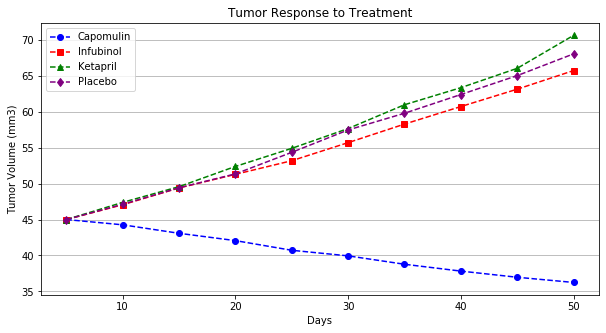

In [151]:
#plot options
plt.figure(figsize = (10,5))
x_axis = avg_volume.index.values+5
cap = avg_volume['Capomulin']
inf = avg_volume['Infubinol']
ket = avg_volume['Ketapril']
pac = avg_volume['Placebo']

cap_graph, = plt.plot(x_axis, cap, marker = 'o', color ='blue',linestyle = '--', label ="Capomulin")
inf_graph, = plt.plot(x_axis, inf, marker = 's', color ='red',linestyle = '--', label ="Infubinol")
ket_graph, = plt.plot(x_axis, ket, marker = '^', color ='green',linestyle = '--', label ="Ketapril")
pac_graph, = plt.plot(x_axis, pac, marker = 'd', color ='purple',linestyle = '--', label ="Placebo")
plt.title('Tumor Response to Treatment')
plt.xlabel('Days')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(axis='y')
plt.legend(loc = 'best')

plt.show()

In [152]:
#group by treatment for metastatic site counts and std error
avg_num_spread = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'])
avg_spread_err = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])

In [153]:
#munging of metastatic site data
avg_num_spread = avg_num_spread.unstack(level = 0)
avg_num_spread.columns = avg_num_spread.columns.get_level_values(level = 1)
avg_num_spread

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [154]:
#munging of metastatic data - std error
avg_spread_err = avg_spread_err.unstack(level = 0)
avg_spread_err.columns = avg_spread_err.columns.get_level_values(level = 1)
avg_spread_err

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


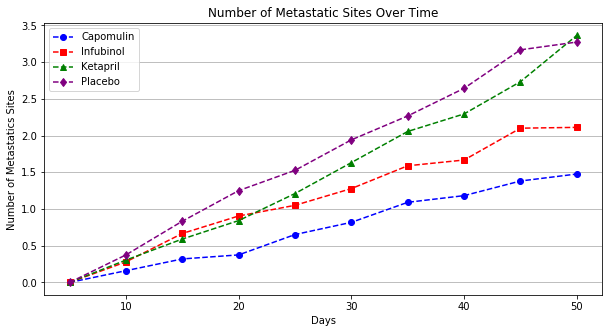

In [155]:
#Plot options
plt.figure(figsize = (10,5))
x_axis = avg_num_spread.index.values+5
cap = avg_num_spread['Capomulin']
inf = avg_num_spread['Infubinol']
ket = avg_num_spread['Ketapril']
pac = avg_num_spread['Placebo']

cap_graph, = plt.plot(x_axis, cap, marker = 'o', color ='blue',linestyle = '--', label ="Capomulin")
inf_graph, = plt.plot(x_axis, inf, marker = 's', color ='red',linestyle = '--', label ="Infubinol")
ket_graph, = plt.plot(x_axis, ket, marker = '^', color ='green',linestyle = '--', label ="Ketapril")
pac_graph, = plt.plot(x_axis, pac, marker = 'd', color ='purple',linestyle = '--', label ="Placebo")
plt.title('Number of Metastatic Sites Over Time')
plt.xlabel('Days')
plt.ylabel('Number of Metastatics Sites')
plt.grid(axis='y')
plt.legend(loc = 'best')

plt.show()

In [156]:

#gets dataframe of data counts at each time point per drug
#this corresponds to how many mice are still in study and therefore, alive
mice_count = merged_df.groupby(['Drug', 'Timepoint']).count()['Mouse ID']
mice_count = mice_count.unstack(level = 0)
mice_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


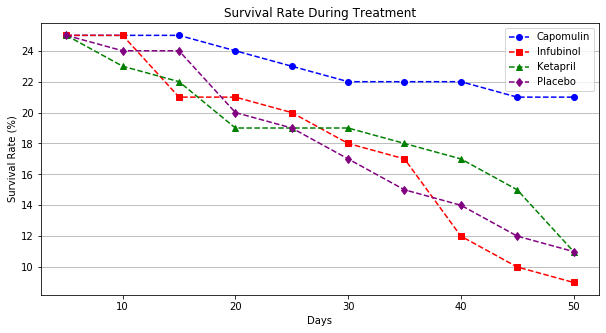

In [157]:
#plot options
plt.figure(figsize = (10,5))
x_axis = mice_count.index.values+5
cap = mice_count['Capomulin']
inf = mice_count['Infubinol']
ket = mice_count['Ketapril']
pac = mice_count['Placebo']

cap_graph, = plt.plot(x_axis, cap, marker = 'o', color ='blue',linestyle = '--', label ="Capomulin")
inf_graph, = plt.plot(x_axis, inf, marker = 's', color ='red',linestyle = '--', label ="Infubinol")
ket_graph, = plt.plot(x_axis, ket, marker = '^', color ='green',linestyle = '--', label ="Ketapril")
pac_graph, = plt.plot(x_axis, pac, marker = 'd', color ='purple',linestyle = '--', label ="Placebo")
plt.title('Survival Rate During Treatment')
plt.xlabel('Days')
plt.ylabel('Survival Rate (%)')
plt.grid(axis='y')
plt.legend(loc = 'best')

plt.show()


In [158]:
# Calculate the percent changes for each drug
tumor_change = (avg_volume.loc[45, :] - avg_volume.loc[0, :])/avg_volume.loc[0, :] * 100
tumor_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [204]:
# Mouse ID g989 is listed with two different drugs but all other records are exact duplicates
# all of those records were excluded, this makes no difference as the Mouse excluded was not liste
# as one of the four drugs in this analysis
file1 = os.path.join('clinicaltrial_data.csv')
file2 = os.path.join('mouse_drug_data.csv')

trial_data = pd.read_csv(file1)
mouse_data = pd.read_csv(file2)

merged_df1 = trial_data.merge(mouse_data, on = 'Mouse ID')

merged_df1 = merged_df1[merged_df1['Mouse ID'] != 'g989']

#keep only the drugs we want to examine
merged_df1 = merged_df1[(merged_df1["Drug"] == 'Capomulin') |
                      (merged_df1["Drug"] == 'Infubinol') |
                      (merged_df1["Drug"] == 'Ketapril') |
                      (merged_df1["Drug"] == 'Placebo')]
merged_df1.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [205]:
avg_volume1 = pd.DataFrame(merged_df1.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])

In [206]:
avg_volume1

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
Ketapril  0                   45.000000
          5                   47.389175
          10                  49.582269
          15                  52.399974
          20                  54.920935
          25                  57.678982
          30                  60.994507
          35                  63.371686
          40                  66.068580
          45                  70.662958
Placebo   0                   45.000000
          5                   47.125589
          10                  49.423329
          15                  51.359742
          20                  54.364417
          25                  57.482574
          30                  59.809063
          35                  62.420615
          40                  65.052675
          45                  68.084082

In [207]:
avg_volume1 = avg_volume1.unstack(level = 0)
avg_volume1.columns = avg_volume1.columns.get_level_values(1)
avg_volume1

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [208]:
tumor_change = (avg_volume1.loc[45, :] - avg_volume1.loc[0, :])/avg_volume1.loc[0, :] * 100
tumor_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

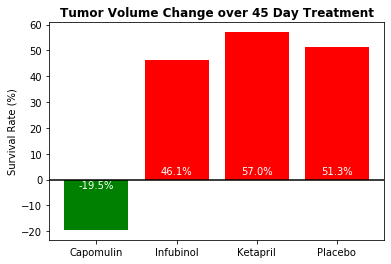

In [209]:
plt.title('Tumor Volume Change over 45 Day Treatment', fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Survival Rate (%)')
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
xlabels = tumor_change.index
#puts drug names as labels
plt.xticks(np.arange(len(xlabels)), xlabels)

#graphs % change of tumor as bar graph
plt.bar(np.arange(4), 
        tumor_change, 
        # colors each bar appropriately based on + or - values by using a conditional
        color = ['red' if tumor_change[r] > 0 else 'green' for r in np.arange(len(xlabels))]
       )

#count for x coordinate location of value label
count = 0

#loops through tumor change data and places the value in the correct position based on + or - values
for r in tumor_change:
    if r < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(r, 1)) + '%', ha = 'center', color = 'white')
    count += 1
    
plt.show()